# Read Data CSV

In [18]:
import pandas as pd
import numpy as np

# Read csv data from specific folder
file01 = 'C:/Users/Andi/H8_PFDS_DS_C1C2_3/Dataset/googleplaystore.csv'
file02 = 'C:/Users/Andi/H8_PFDS_DS_C1C2_3/Dataset/googleplaystore_user_reviews.csv'
df = pd.read_csv(file01)
df_user = pd.read_csv(file02)

# Check NA values
total = df.isnull().sum().sort_values(ascending=False)
percent = 100*(df.isnull().sum()/df.isnull().count()
               ).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# print(missing_data)

# Drop important columns for NA value
df.dropna(how='any', inplace=True)
# df		= df.dropna(subset=['Type', 'Genres'])

# Check NA values
total = df.isnull().sum().sort_values(ascending=False)
percent = 100*(df.isnull().sum()/df.isnull().count()
               ).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# print(missing_data)

# Align the value to proper dtypes
# print(df.dtypes)
df['Price'] = df['Price'].apply(lambda x: x.replace(
    '$', '').replace(' ', '')).astype('float')
df['Installs'] = df['Installs'].apply(
    lambda x: x.replace(',', '').replace('+', '')).astype('float')
# print(df.dtypes)

# Find max and min Price Application which only 'Paid' Type
apps_paid = df[df['Type'] == 'Paid']
max_price = apps_paid.Price.max()
min_price = apps_paid.Price.min()
# max_price		= df.query('Type =="Paid"')['Price'].max()
# min_price		= df.query('Type =="Paid"')['Price'].min()
list_max_Price = df.where(df['Price'] == max_price).dropna(subset=['App'])
list_min_Price = df.where(df['Price'] == min_price).dropna(subset=['App'])
# print('Applikasi termahal ( $', max_price, ') ==> ',
#      list_max_Price['App'].unique())
# print('Applikasi termurah ( $', min_price, ') ==> ',
#      list_min_Price['App'].unique())

In [2]:
# Find max and min Price Application which only 'Paid' Type
max_price = df.query('Type =="Paid"')['Price'].max()
min_price = df.query('Type =="Paid"')['Price'].min()
list_max_Price = df.where(df['Price'] == max_price).dropna(subset=['App'])
list_min_Price = df.where(df['Price'] == min_price).dropna(subset=['App'])
print('Applikasi termahal ( $'+str(max_price)+') ==> ',
      list_max_Price['App'].unique())
print('Applikasi termurah ( $', min_price, ') ==> ',
      list_min_Price['App'].unique())

Applikasi termahal ( $400.0) ==>  ["I'm Rich - Trump Edition"]
Applikasi termurah ( $ 0.99 ) ==>  ['All-in-One Mahjong 3' 'World Racers family board game'
 'SweetLand — Family Board Game' 'iBP Blood Pressure'
 'Blood Pressure Companion' 'Nursing Care Plan NANDA Tables'
 'palmPEDi: Pediatric Tape' 'HD Widgets' 'Kairo XP (for HD Widgets)'
 'B-52 Spirits of Glory Deluxe' 'Neon Glow C - Icon Pack' 'Hitman Sniper'
 'Koi Live Wallpaper' 'Go' 'A41 WatchFace for Android Wear Smart Watch'
 'Cut the Rope GOLD' "Ghosts'n Goblins MOBILE"
 "Lock 'n' Roll Pro - Ad Free" 'Planet O - Icon Pack' 'P-Home for KLWP'
 '[Sub/EMUI] P Pro - EMUI 8.1/8.0/5.X Theme'
 'Volume Slider Like Android P Volume Control' 'Android P Style Icon Pack'
 'pretty Easy privacy p≡p'
 'Q Alerts: QAnon Drop Notifications, Research +++' 'Neon-R (Red)'
 'Jurassic Life: T Rex Simulator' 'Mental Hospital V'
 'W-History Standalone' 'Light X - Icon Pack' 'X-Plane to GPS'
 'X Back - Icon Pack' 'Zombie Avengers:(Dreamsky)Stickman War Z'


In [3]:
# Create new table to calculate Application by category
columns_to_keep = ['App','Category']
df_Category = df[columns_to_keep]
df_Category = df_Category.drop_duplicates()
print(df_Category['Category'].value_counts())

FAMILY                 1683
GAME                    913
TOOLS                   719
FINANCE                 302
LIFESTYLE               301
PRODUCTIVITY            301
PERSONALIZATION         296
MEDICAL                 291
BUSINESS                263
PHOTOGRAPHY             263
SPORTS                  262
COMMUNICATION           257
HEALTH_AND_FITNESS      244
NEWS_AND_MAGAZINES      204
SOCIAL                  203
TRAVEL_AND_LOCAL        187
SHOPPING                180
BOOKS_AND_REFERENCE     169
VIDEO_PLAYERS           149
DATING                  134
MAPS_AND_NAVIGATION     118
EDUCATION               118
ENTERTAINMENT           102
FOOD_AND_DRINK           94
AUTO_AND_VEHICLES        73
WEATHER                  72
LIBRARIES_AND_DEMO       63
HOUSE_AND_HOME           62
ART_AND_DESIGN           60
COMICS                   54
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64


In [4]:
# Calculate Application having most downloaded
max_Installs = df['Installs'].max()
list_max_Installs = df.where(df['Installs']==max_Installs).dropna(subset=['App'])
print('Applikasi terbanyak didownload ',list_max_Installs['App'].unique())

Applikasi terbanyak didownload  ['Google Play Books' 'Messenger – Text and Video Chat for Free'
 'WhatsApp Messenger' 'Google Chrome: Fast & Secure' 'Gmail' 'Hangouts'
 'Skype - free IM & video calls' 'Google Play Games' 'Subway Surfers'
 'Facebook' 'Instagram' 'Google+' 'Google Photos'
 'Maps - Navigate & Explore' 'Google Street View' 'Google' 'Google Drive'
 'YouTube' 'Google Play Movies & TV' 'Google News']


In [5]:
# Calculate Average Rating for each Category
columns_to_keep = ['App','Category','Rating']
df_Rating = df[columns_to_keep]
df_Rating = df_Rating.dropna(subset=['Rating'])
# print(df_Rating.shape)
df_Rating = df_Rating.drop_duplicates()
columns_to_keep = ['Category','Rating']
df_Rating = df_Rating[columns_to_keep]
df_Rating.groupby(['Category']).mean()

,Rating
Category,
ART_AND_DESIGN,4.376667
AUTO_AND_VEHICLES,4.190411
BEAUTY,4.278571
BOOKS_AND_REFERENCE,4.344970
BUSINESS,4.098479
COMICS,4.181481
COMMUNICATION,4.121401
DATING,3.970149
EDUCATION,4.364407


In [6]:
# Calculate Number of Application for each Genre
columns_to_keep = ['App','Genres']
df_Genres = df[columns_to_keep]
df_Genres = df_Genres.dropna(subset=['Genres'])
df_Genres = df_Genres.drop_duplicates()
# print(df_Genres.shape)
df_Genres.groupby(['Genres']).count()

,App
Genres,
Action,292
Action;Action & Adventure,12
Adventure,71
Adventure;Action & Adventure,5
Adventure;Brain Games,1
...,...
Video Players & Editors,148
Video Players & Editors;Creativity,1
Video Players & Editors;Music & Video,2


In [7]:
# Calculate Rating Statistic for each Category
columns_to_keep = ['App','Genres','Rating']
df_Ratstat = df[columns_to_keep]
df_Ratstat = df_Ratstat.dropna(subset=['Rating'])
print(df_Ratstat.shape)
df_Ratstat = df_Ratstat.drop_duplicates()
from scipy import stats
table = pd.pivot_table(df_Ratstat, index=['Genres'],values="Rating",
                       aggfunc={np.mean, np.median, stats.mode})

(9360, 3)


In [9]:
df.describe()

,Rating,Reviews,Installs,Price
count,9360.000000,9.360000e+03,9.360000e+03,9360.000000
mean,4.191838,5.143767e+05,1.790875e+07,0.961279
std,0.515263,3.145023e+06,9.126637e+07,15.821640
min,1.000000,1.000000e+00,1.000000e+00,0.000000
25%,4.000000,1.867500e+02,1.000000e+04,0.000000
50%,4.300000,5.955000e+03,5.000000e+05,0.000000
75%,4.500000,8.162750e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


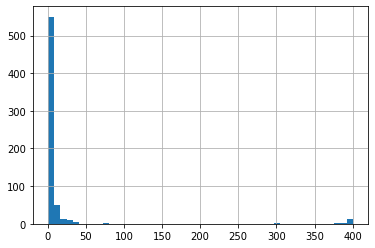

In [19]:
# Set matplotlib as inline
%matplotlib inline
apps_paid['Price'].hist(bins=50)